In [1]:
import tensorflow
tensorflow.__version__

'1.4.0'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import zipfile
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing import image

np.random.seed(100)
%matplotlib inline

In [4]:
from bokeh import __version__ as bokeh_version
print("Bokeh - %s" % bokeh_version)              
from seaborn import __version__ as seaborn_version
print("Seaborn - %s" % seaborn_version)

Bokeh - 0.12.13
Seaborn - 0.8.0


In [5]:
# Import the required libraries for seaborn and bokeh

import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [6]:
rsna_train_label = pd.read_csv('data/boneage-training-dataset.csv', header=0, sep=',')
rsna_test_label = pd.read_csv('data/boneage-test-dataset.csv', header=0, sep=',')

In [7]:
rsna_train_label.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [8]:
# Format male column
rsna_train_label.loc[:,'male'] = pd.Series(rsna_train_label['male'].astype(int))

In [9]:
rsna_train_label.head()

,id,boneage,male
0,1377,180,0
1,1378,12,0
2,1379,94,0
3,1380,120,1
4,1381,82,0


In [10]:
rsna_train_label['male'].value_counts()

1    6833
0    5778
Name: male, dtype: int64

In [11]:
rsna_test_label.head()

,Case ID,Sex
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M


In [12]:
rsna_test_label['Sex'].value_counts()

M    100
F    100
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


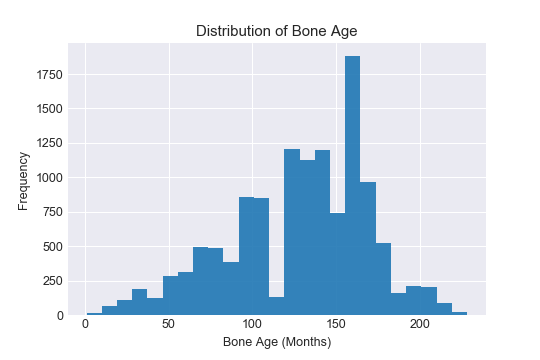

In [13]:
%matplotlib notebook

sns.set_style('darkgrid')
plot = plt.figure()
ax1 = plot.add_subplot(111)
ax1.hist(rsna_train_label['boneage'], alpha=0.9, bins=25)
ax1.set_xlabel('Bone Age (Months)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Bone Age')
plt.show()

In [14]:
# dimensions of our images
img_width, img_height = 512, 512

In [15]:
ROOT_PATH = "data/"
train_data_directory = os.path.join(ROOT_PATH, "boneage-training-dataset")
test_data_directory = os.path.join(ROOT_PATH, "boneage-test-dataset")

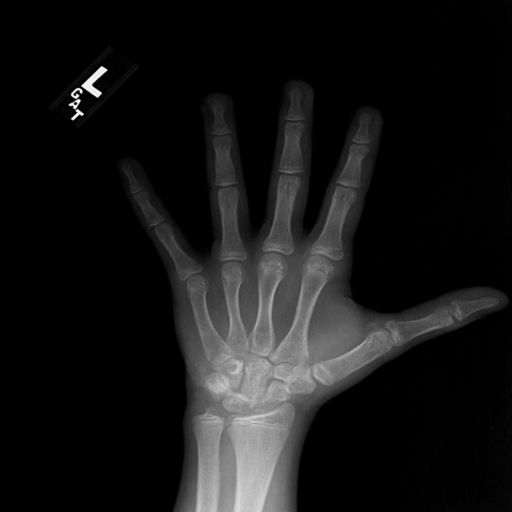

In [16]:
img_path = os.path.join(train_data_directory, '10001.png')
img = image.load_img(img_path, target_size=(img_width, img_height))
img

In [17]:
print(train_data_directory)
print(test_data_directory)

data/boneage-training-dataset
data/boneage-test-dataset


In [18]:
%%time

import os
import cv2
img_files = []
num_imgs = 12611

images_dataFrame = pd.DataFrame(columns=['id', 'image'])

img_files =  os.listdir(train_data_directory)

count = 0
for img_file in img_files[:num_imgs]:
    name = img_file.split('.')[0]
    try:
        img = cv2.imread(train_data_directory + '/' + img_file)
        img = cv2.resize(img, (img_width, img_height))
        #img = np.array(img, dtype='float32')
        images_dataFrame.loc[count] = [name, img]
        count += 1
    except(IOError, OSError):
        print('error')
        pass


Wall time: 8min 2s


In [20]:
images_dataFrame.head()

,id,image
0,10000,"[[[248, 248, 248], [232, 232, 232], [203, 203,..."
1,10001,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,10002,"[[[115, 115, 115], [88, 88, 88], [72, 72, 72],..."
3,10003,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,10004,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [21]:
images_dataFrame['id'] = images_dataFrame.id.astype('int64')
images_dataFrame['id'].dtype

dtype('int64')

In [22]:
rsna_train_label.head()

,id,boneage,male
0,1377,180,0
1,1378,12,0
2,1379,94,0
3,1380,120,1
4,1381,82,0


In [23]:
rsna_train = pd.merge(rsna_train_label, images_dataFrame, on='id')
rsna_train.head()

,id,boneage,male,image
0,1377,180,0,"[[[239, 239, 239], [239, 239, 239], [243, 243,..."
1,1378,12,0,"[[[129, 129, 129], [128, 128, 128], [129, 129,..."
2,1379,94,0,"[[[129, 129, 129], [127, 127, 127], [128, 128,..."
3,1380,120,1,"[[[66, 66, 66], [62, 62, 62], [60, 60, 60], [5..."
4,1381,82,0,"[[[127, 127, 127], [128, 128, 128], [128, 128,..."


In [24]:
rsna_train = rsna_train.drop(['id'], axis=1)

In [25]:
rsna_train.head()

,boneage,male,image
0,180,0,"[[[239, 239, 239], [239, 239, 239], [243, 243,..."
1,12,0,"[[[129, 129, 129], [128, 128, 128], [129, 129,..."
2,94,0,"[[[129, 129, 129], [127, 127, 127], [128, 128,..."
3,120,1,"[[[66, 66, 66], [62, 62, 62], [60, 60, 60], [5..."
4,82,0,"[[[127, 127, 127], [128, 128, 128], [128, 128,..."


In [26]:
rsna_train['image'][0]

array([[[239, 239, 239],
        [239, 239, 239],
        [243, 243, 243],
        ..., 
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       [[242, 242, 242],
        [242, 242, 242],
        [246, 246, 246],
        ..., 
        [ 73,  73,  73],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[237, 237, 237],
        [237, 237, 237],
        [242, 242, 242],
        ..., 
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 73,  73,  73]],

       ..., 
       [[230, 230, 230],
        [228, 228, 228],
        [231, 231, 231],
        ..., 
        [ 47,  47,  47],
        [ 49,  49,  49],
        [ 45,  45,  45]],

       [[222, 222, 222],
        [220, 220, 220],
        [222, 222, 222],
        ..., 
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[229, 229, 229],
        [226, 226, 226],
        [226, 226, 226],
        ..., 
        [ 51,  51,  51],
        [ 50,  50,  50],
        [ 45,  45,

In [27]:
rsna_train['image'].shape

(12611,)

In [28]:
rsna_train['image'][0].shape

(512, 512, 3)

In [29]:
rsna = rsna_train['image']

In [30]:
rsna.shape

(12611,)

In [31]:
rsna.head()

0    [[[239, 239, 239], [239, 239, 239], [243, 243,...
1    [[[129, 129, 129], [128, 128, 128], [129, 129,...
2    [[[129, 129, 129], [127, 127, 127], [128, 128,...
3    [[[66, 66, 66], [62, 62, 62], [60, 60, 60], [5...
4    [[[127, 127, 127], [128, 128, 128], [128, 128,...
Name: image, dtype: object

In [32]:
rsna[0].shape

(512, 512, 3)

In [33]:
images = []
for i, x in rsna_train.iterrows():
    images.append(rsna_train.loc[i, 'image'])
    
#X_train = np.array(images, dtype='float32')

In [34]:
len(images)

12611

In [35]:
images[0].shape

(512, 512, 3)

In [36]:
X_train = np.array(images, dtype='float32')

In [37]:
X_train.shape

(12611, 512, 512, 3)

In [70]:
gender = rsna_train['male'].values

In [71]:
bone_age = rsna_train['boneage'].values

In [72]:
y_train = rsna_train['boneage'].values
y_train.shape

(12611,)

In [40]:
# Normalize the data
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
X_train /= 255
#X_test /= 255

In [44]:
X_train.shape

(12611, 512, 512, 3)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [79]:
from keras.preprocessing.image import ImageDataGenerator

print("Augment the training dataset...")
train_data_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)

val_data_gen = ImageDataGenerator()

def gen_train_two_inputs(x, y, z):
    X1 = train_data_gen.flow(x, y, batch_size=batch_size, seed=2)
    X2 = train_data_gen.flow(x, z, batch_size=batch_size, seed=2)
    while True:
        X1i = X1.next()
        X2i = X2.next()
        yield [X1i[0], X1i[1]], X2i[1]
        
def gen_val_two_inputs(x, y, z):
    X1 = val_data_gen.flow(x, y, batch_size=batch_size, seed=2)
    X2 = val_data_gen.flow(x, z, batch_size=batch_size, seed=2)
    while True:
        X1i = X1.next()
        X2i = X2.next()
        yield [X1i[0], X1i[1]], X2i[1]

Augment the training dataset...


In [80]:
training_size = int(.85 * num_imgs)
train_gen_flow = gen_train_two_inputs(X_train[training_size:], gender[training_size:], bone_age[training_size:])
val_gen_flow = gen_val_two_inputs(X_train[:training_size], gender[:training_size], bone_age[:training_size])

In [82]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.metrics import mean_absolute_error
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

v3_model = InceptionV3(input_shape = X_train.shape[1:], include_top = False, weights = 'imagenet')
#v3_model.trainable = True

for layer in v3_model.layers:
    layer.trainable = False

pixel_branch = v3_model.output
pixel_branch = Flatten()(pixel_branch)

new_model = Model(inputs=v3_model.input, outputs=pixel_branch)

text_branch = Sequential()
text_branch.add(Dense(128, input_shape=(1,), activation='relu'))

# merged = Merge([new_model, text_branch], mode='concat')
merged = keras.layers.concatenate([new_model.output, text_branch.output])

age = Dense(1000, activation='relu')(merged)
age = Dense(1000, activation='relu')(age)
age = Dense(1)(age)

# show model
# model.summary()
model = Model(inputs=[v3_model.input, text_branch.input], outputs=age)

In [83]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 255, 255, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, 255, 255, 32) 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 255, 255, 32) 0           batch_normalization_471[0][0]    
__________________________________________________________________________________________________
conv2d_472

In [84]:
%%time
validation_split = 0.2
nb_epoch = 100
batch_size = 32

#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) 
#model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae', 'acc'])

Wall time: 48 ms


In [85]:
# Call backs
save_best = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001) 

In [ ]:
%%time

# fit data
model.fit_generator(
    train_gen_flow,
    steps_per_epoch=340,
    epochs=100,
    validation_data=val_gen_flow,
    validation_steps=60,
    callbacks=[save_best, reduceLROnPlat]
)

Epoch 1/100
